In [21]:
from pyspark.sql import SparkSession
spark=(SparkSession.builder.appName("CapstoneML").config("hive.metastore.uris","thrift://ip-10-1-2-24.ap-south-1.compute.internal:9083").enableHiveSupport().getOrCreate())

In [22]:
spark

In [23]:
import pandas as pd

In [24]:
var6=spark.sql("select ee.emp_no,ee.emp_titles_id,ee.birth_date,ee.first_name,ee.last_name,ee.sex,ee.hire_date,ee.no_of_projects,ee.last_performance_rating,ee.left_company,ee.last_date,s.salary,t.title,d.dept_name from anabig114243.employees ee full outer join anabig114243.salaries s  on s.emp_no=ee.emp_no full outer join anabig114243.titles t on ee.emp_titles_id=t.title_id full outer join anabig114243.dept_managers dm on ee.emp_no=dm.emp_no full outer join anabig114243.departments d on dm.dept_no=d.dept_no")

In [25]:
var7=var6.toPandas()
var7

,emp_no,emp_titles_id,birth_date,first_name,last_name,sex,hire_date,no_of_projects,last_performance_rating,left_company,last_date,salary,title,dept_name
0,110511,m0001,08-07-1957,DeForest,Hagimont,M,01-01-1985,7,A,0,0\r,48626.0,Manager,development
1,110567,m0001,25-04-1964,Leon,DasSarma,F,21-10-1986,6,B,0,0\r,40000.0,Manager,development
2,111784,m0001,14-06-1956,Marjo,Giarratana,F,12-02-1988,5,A,0,0\r,40000.0,Manager,Customer Service
3,111692,m0001,05-10-1954,Tonny,Butterworth,F,01-01-1985,9,C,0,0\r,40000.0,Manager,Customer Service
4,111877,m0001,18-10-1962,Xiaobin,Spinelli,F,17-08-1991,7,C,0,0\r,53846.0,Manager,Customer Service
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300020,110854,m0001,19-08-1960,Dung,Pesch,M,09-06-1989,2,PIP,0,0\r,45169.0,Manager,Quality Management
300021,110765,m0001,22-05-1954,Rutger,Hofmeyr,F,07-01-1989,6,B,0,0\r,40055.0,Manager,Quality Management
300022,110725,m0001,14-03-1961,Peternela,Onuegbe,F,01-01-1985,4,A,1,31-03-1996\r,61357.0,Manager,Quality Management
300023,111534,m0001,27-06-1952,Hilary,Kambil,F,31-01-1988,5,B,0,0\r,48077.0,Manager,Research


In [43]:
var8=var7.drop(['first_name','last_name','emp_no','emp_titles_id','birth_date','hire_date','last_date',],axis='columns')


In [31]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
np.random.seed(0)
from pyspark.mllib.stat import Statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
#Check for Missing Values
var8.isnull().any()


sex                        False
no_of_projects             False
last_performance_rating    False
left_company               False
salary                      True
title                       True
dept_name                   True
dtype: bool

In [45]:
var8.dtypes



sex                         object
no_of_projects               int32
last_performance_rating     object
left_company                 int32
salary                     float64
title                       object
dept_name                   object
dtype: object

In [34]:
# 0-Those who are still working and 1-those who left the company  
var8['left_company'].value_counts()

0    270158
1     29867
Name: left_company, dtype: int64

#### those who left the company are less than 1 percent

In [35]:
var8.groupby('dept_name').mean()

,no_of_projects,left_company,salary
dept_name,,,
Customer Service,7.00,0.00,43461.5
Finance,3.00,0.50,56048.0
Human Resources,8.50,0.00,44145.5
Marketing,3.00,0.00,70553.5
Production,3.50,0.00,43114.5
Quality Management,4.75,0.25,49259.5
Research,3.00,0.00,60261.5
Sales,2.50,0.00,71380.0
development,6.50,0.00,44313.0


In [46]:
var8.groupby('salary').mean()

,no_of_projects,left_company
salary,,
40000.0,5.489176,0.101494
40001.0,3.200000,0.200000
40002.0,4.600000,0.200000
40003.0,4.555556,0.000000
40004.0,4.777778,0.000000
...,...,...
125469.0,2.000000,0.000000
126703.0,1.000000,0.000000
127041.0,4.000000,0.000000


In [47]:
var8.groupby('sex').mean()

,no_of_projects,left_company,salary
sex,,,
,0.000000,0.000000,NaN
F,5.499571,0.099183,52953.836428
M,5.508332,0.099793,52982.002945


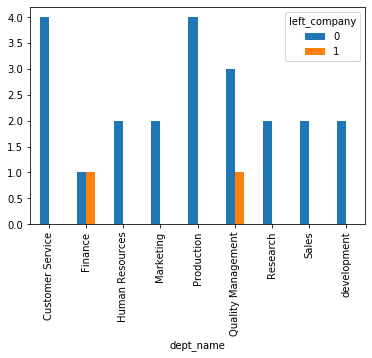

In [48]:


#Bar chart for department employee work for and the frequency of turnover
pd.crosstab(var8.dept_name,var8.left_company).plot(kind='bar')
#plt.title('Department')
#plt.xlabel('Department')
#plt.ylabel('Frequency of Turnover')
#plt.savefig('department_bar_chart')

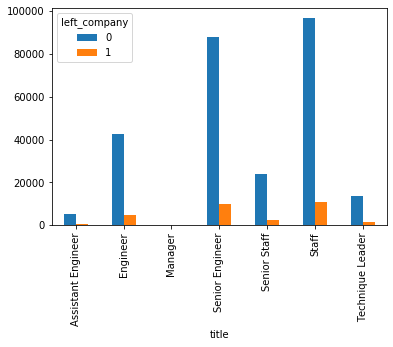

In [63]:
pd.crosstab(var8.title,var8.left_company).plot(kind='bar')

### Employee who left the company depends on the department they work for. Thus, department can be a good predictor of the outcome variable.

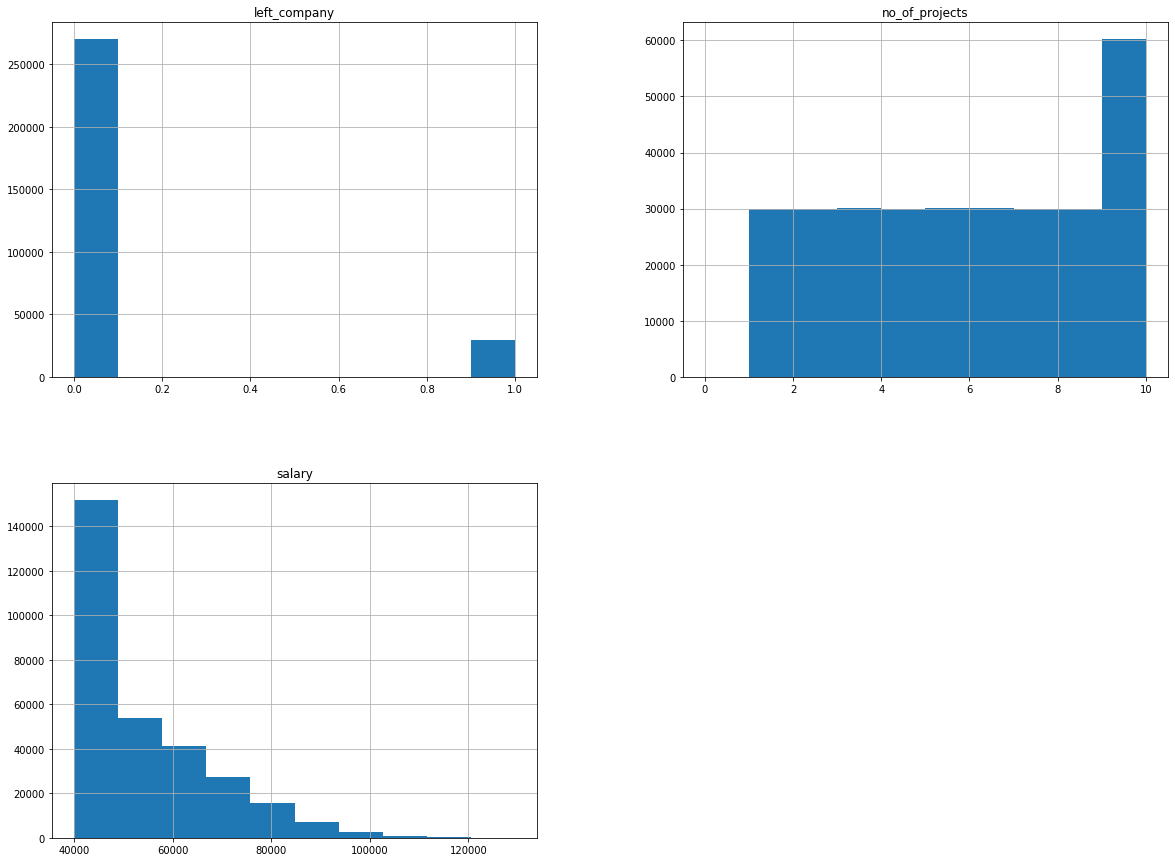

In [49]:
#Histogram of numeric variables
num_bins = 10

var8.hist(bins=num_bins, figsize=(20,15))
plt.savefig("var8_histogram_plots")
plt.show()

In [ ]:
cat_vars2=['sex','last_performance_rating','title','dept_name',]
for var in cat_vars2:
    cat_list2='var'+'_'+var
    cat_list2 = pd.get_dummies(var8[var], prefix=var)
    var9=var8.join(cat_list2)
    var8=var9
    

In [67]:
var8.columns.values

array(['no_of_projects', 'left_company', 'salary', 'title', 'sex_',
       'sex_F', 'sex_M', 'last_performance_rating_',
       'last_performance_rating_A', 'last_performance_rating_B',
       'last_performance_rating_C', 'last_performance_rating_PIP',
       'last_performance_rating_S', 'dept_name_Customer Service',
       'dept_name_Finance', 'dept_name_Human Resources',
       'dept_name_Marketing', 'dept_name_Production',
       'dept_name_Quality Management', 'dept_name_Research',
       'dept_name_Sales', 'dept_name_development'], dtype=object)

In [68]:
var10=var8.drop(['sex_'],axis='columns')

In [69]:
var10.columns.values

array(['no_of_projects', 'left_company', 'salary', 'title', 'sex_F',
       'sex_M', 'last_performance_rating_', 'last_performance_rating_A',
       'last_performance_rating_B', 'last_performance_rating_C',
       'last_performance_rating_PIP', 'last_performance_rating_S',
       'dept_name_Customer Service', 'dept_name_Finance',
       'dept_name_Human Resources', 'dept_name_Marketing',
       'dept_name_Production', 'dept_name_Quality Management',
       'dept_name_Research', 'dept_name_Sales', 'dept_name_development'],
      dtype=object)

In [93]:
var11=var10.drop(['last_performance_rating_','title'],axis='columns')

In [94]:
var11.columns.values

array(['no_of_projects', 'left_company', 'salary', 'sex_F', 'sex_M',
       'last_performance_rating_A', 'last_performance_rating_B',
       'last_performance_rating_C', 'last_performance_rating_PIP',
       'last_performance_rating_S', 'dept_name_Customer Service',
       'dept_name_Finance', 'dept_name_Human Resources',
       'dept_name_Marketing', 'dept_name_Production',
       'dept_name_Quality Management', 'dept_name_Research',
       'dept_name_Sales', 'dept_name_development'], dtype=object)

In [96]:
var12=var11.columns.values.tolist()
y=['left_company']
X=[i for i in var12 if i not in y]

In [106]:
type(var11)

pandas.core.frame.DataFrame

In [98]:
X

['no_of_projects',
 'salary',
 'sex_F',
 'sex_M',
 'last_performance_rating_A',
 'last_performance_rating_B',
 'last_performance_rating_C',
 'last_performance_rating_PIP',
 'last_performance_rating_S',
 'dept_name_Customer Service',
 'dept_name_Finance',
 'dept_name_Human Resources',
 'dept_name_Marketing',
 'dept_name_Production',
 'dept_name_Quality Management',
 'dept_name_Research',
 'dept_name_Sales',
 'dept_name_development']

In [104]:
var11=var11.fillna(0)

In [105]:
var11.isnull().any()

no_of_projects                  False
left_company                    False
salary                          False
sex_F                           False
sex_M                           False
last_performance_rating_A       False
last_performance_rating_B       False
last_performance_rating_C       False
last_performance_rating_PIP     False
last_performance_rating_S       False
dept_name_Customer Service      False
dept_name_Finance               False
dept_name_Human Resources       False
dept_name_Marketing             False
dept_name_Production            False
dept_name_Quality Management    False
dept_name_Research              False
dept_name_Sales                 False
dept_name_development           False
dtype: bool

In [108]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#Recursive Feature Elimination (RFE)
model = LogisticRegression()

rfe = RFE(model, 10)
rfe = rfe.fit(var11[X],var11[y])
print(rfe.support_)
print(rfe.ranking_) 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ True  True  True  True  True  True  True  True  True False  True False
 False False False False False False]
[1 1 1 1 1 1 1 1 1 3 1 5 8 2 4 7 9 6]


In [110]:
X

['no_of_projects',
 'salary',
 'sex_F',
 'sex_M',
 'last_performance_rating_A',
 'last_performance_rating_B',
 'last_performance_rating_C',
 'last_performance_rating_PIP',
 'last_performance_rating_S',
 'dept_name_Customer Service',
 'dept_name_Finance',
 'dept_name_Human Resources',
 'dept_name_Marketing',
 'dept_name_Production',
 'dept_name_Quality Management',
 'dept_name_Research',
 'dept_name_Sales',
 'dept_name_development']

In [111]:

cols=['no_of_projects', 'salary', 'sex_F', 'sex_M', 'last_performance_rating_A','last_performance_rating_B',
      'last_performance_rating_C','last_performance_rating_PIP','last_performance_rating_S','dept_name_Finance' ] 
X=var11[cols]
y=var11['left_company']

In [113]:
#Split data into training and test samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [114]:
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [115]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.901


In [122]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [119]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.849


In [120]:
#SVM Classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [121]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Support vector machine accuracy: 0.901


### Using logistic regression and svm classifier accuracy is 0.90 while using random forest it is coming out 0.84
### logistic and svm are better in this case than random forest